In [1]:
data(iris)
library(ggplot2)

In [2]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


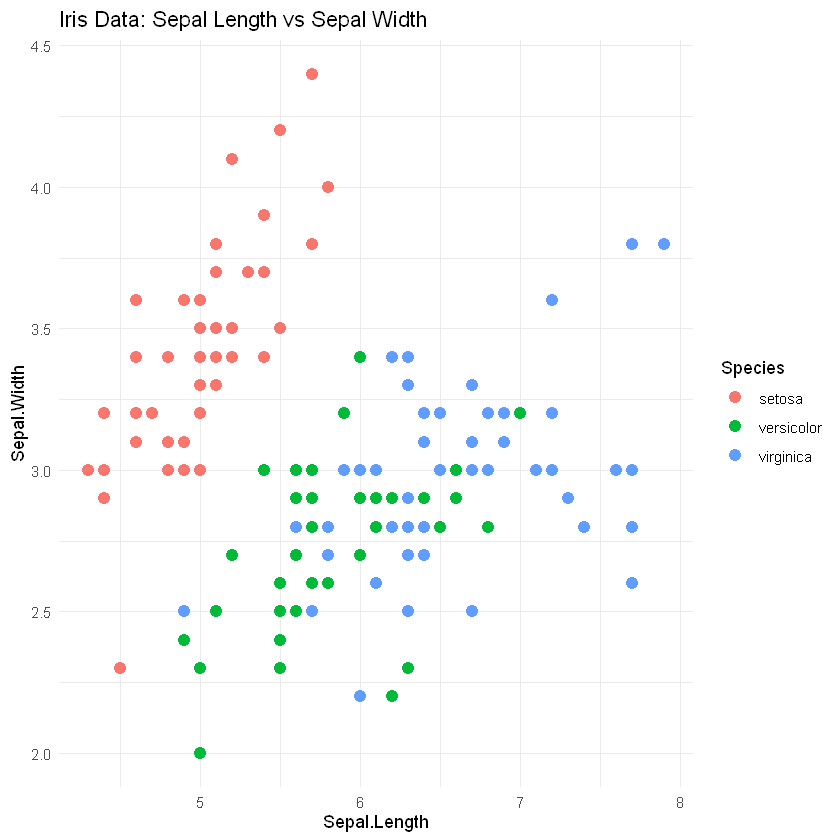

In [3]:
ggplot(iris, aes(x = Sepal.Length, y = Sepal.Width, color = Species)) +
  geom_point(size = 3) +
  labs(title = "Iris Data: Sepal Length vs Sepal Width") +
  theme_minimal()

Importance of components:
                          PC1     PC2    PC3     PC4
Standard deviation     2.0563 0.49262 0.2797 0.15439
Proportion of Variance 0.9246 0.05307 0.0171 0.00521
Cumulative Proportion  0.9246 0.97769 0.9948 1.00000

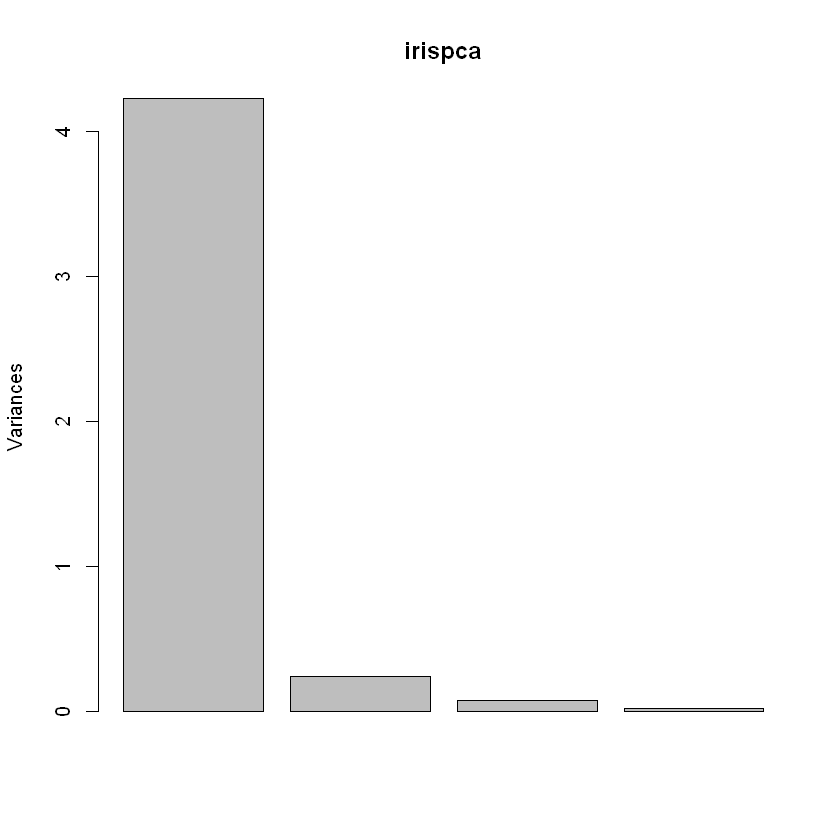

In [4]:
irispca <- prcomp(iris[, -5])
summary(irispca)
plot(irispca)

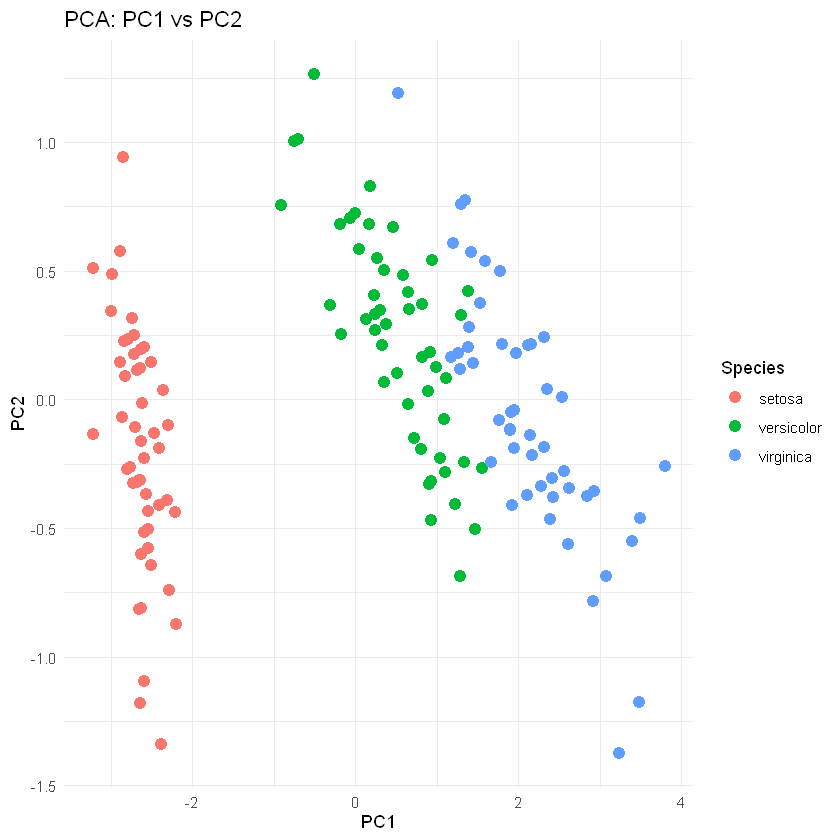

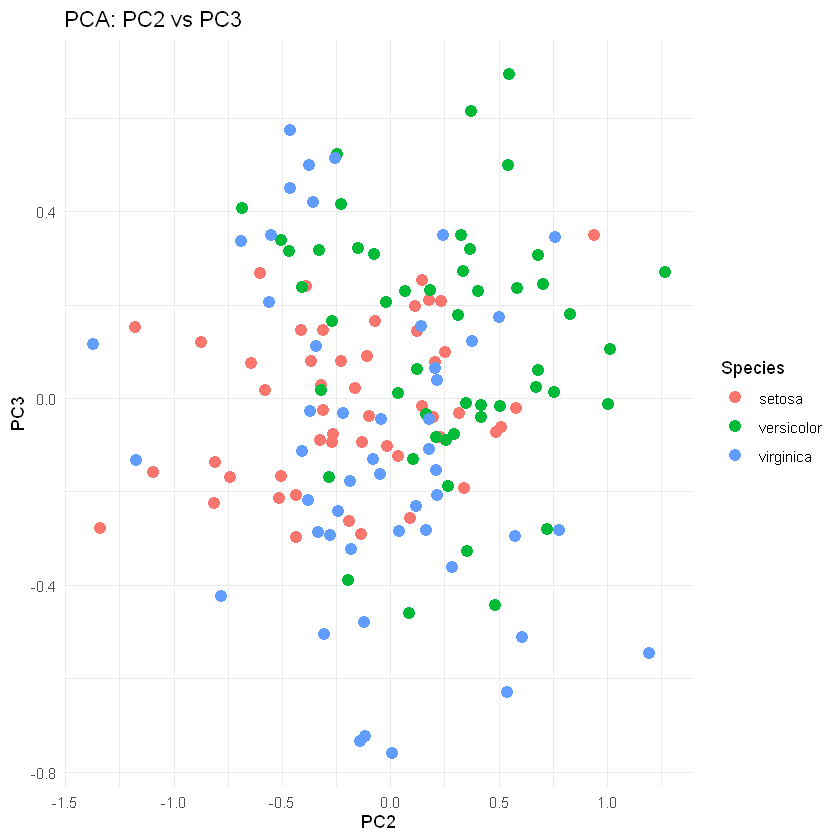

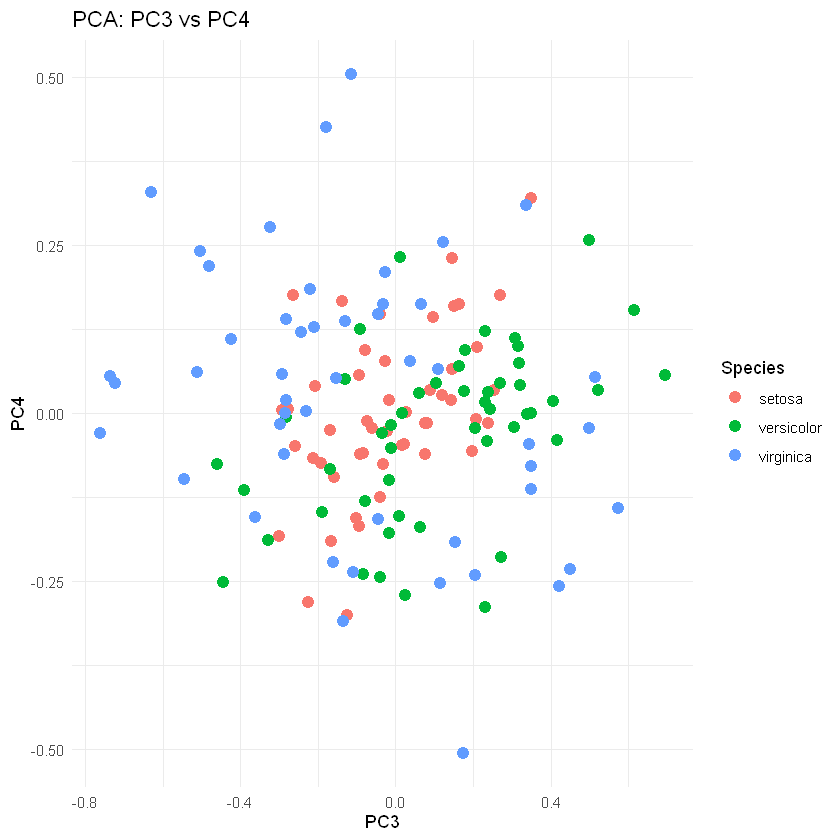

In [5]:
pca_df <- data.frame(irispca$x, Species = iris$Species)

ggplot(pca_df, aes(x = PC1, y = PC2, color = Species)) +
  geom_point(size = 3) +
  labs(title = "PCA: PC1 vs PC2") +
  theme_minimal()

ggplot(pca_df, aes(x = PC2, y = PC3, color = Species)) +
  geom_point(size = 3) +
  labs(title = "PCA: PC2 vs PC3") +
  theme_minimal()

ggplot(pca_df, aes(x = PC3, y = PC4, color = Species)) +
  geom_point(size = 3) +
  labs(title = "PCA: PC3 vs PC4") +
  theme_minimal()


[1] 0.924618723 0.053066483 0.017102610 0.005212184

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


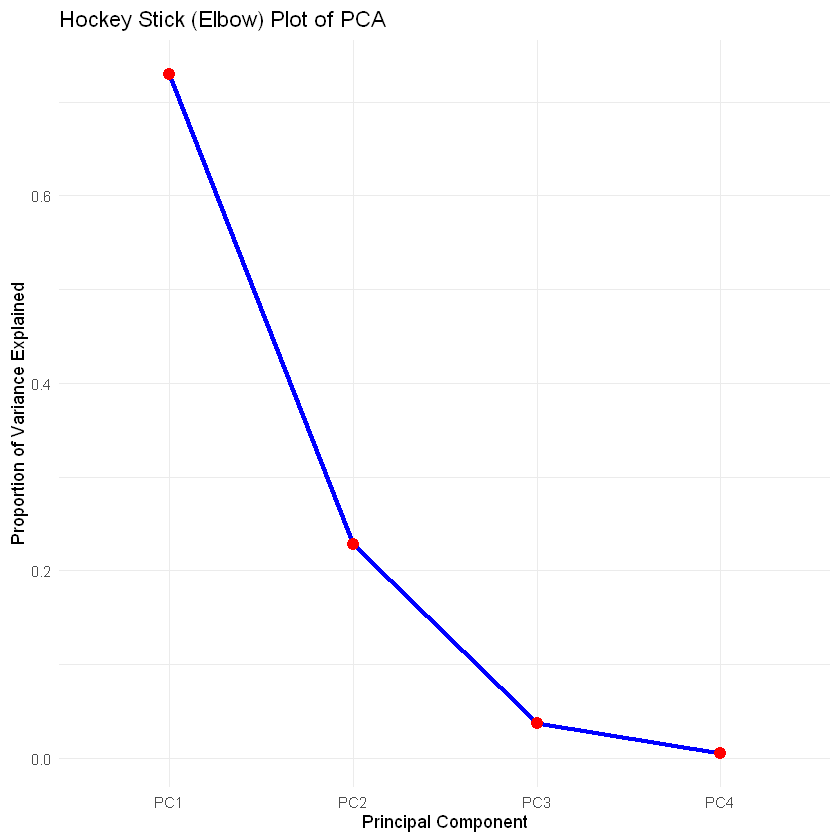

In [6]:
var <- irispca$sdev^2
(pve <- var/sum(var))



# Run PCA
data(iris)
irispca <- prcomp(iris[, -5], center = TRUE, scale. = TRUE)

pca_var <- irispca$sdev^2
pca_var_explained <- pca_var / sum(pca_var)

pca_df <- data.frame(
  PC = paste0("PC", 1:length(pca_var_explained)),
  Variance_Explained = pca_var_explained
)

ggplot(pca_df, aes(x = PC, y = Variance_Explained)) +
  geom_line(group = 1, color = "blue", size = 1.2) +
  geom_point(size = 3, color = "red") +
  labs(
    title = "Hockey Stick (Elbow) Plot of PCA",
    x = "Principal Component",
    y = "Proportion of Variance Explained"
  ) +
  theme_minimal()


In [7]:
cumsum(pve)

[1] 0.9246187 0.9776852 0.9947878 1.0000000